# Exploratory Data Analysis (EDA)

### Note: all commentary is based on a sample of the overall apartment options as of March 2023. Continuous changes as daily data is added is expected and may not line up with the comments originally posted.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

#### Start by importing the data that has been cleaned.

In [2]:
# Import the cleaned data
df = pd.read_csv('../Data/Cleaned_Data_03212024.csv')

In [3]:
# Set the max columns to infinite so that we may view all of them
pd.set_option('display.max_columns', None)

#### Show the first five rows of the data.

In [4]:
# First five rows of data
df.head()

,title,price,Bedrooms,square_feet,full_address,monthly,apartment,cats_allowed,dogs_allowed,laundry_on_site,air_conditioning,off_street_parking,EV_charging,washer_dryer_in_unit,no_smoking,carport,attached_garage,detached_garage,laundry_in_bldg,fee_needed_to_apply,wheelchair_accessible,no_parking,furnished,street_parking,no_laundry_on_site,house,washer_dryer_hookups,latitude,longitude,nearest_budget_grocery_store_distance,nearest_budget_grocery_store,nearest_midTier_grocery_store_distance,nearest_midTier_grocery_store,nearest_premium_grocery_store_distance,nearest_premium_grocery_store
0,1 Bedroom in Marina Del Rey -Quartz Counters -...,3295,1br,750.0,"415 Washington Boulevard, Venice, CA 90292",1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33.981495,-118.463117,1.212094,"Costco Bakery - 13463 Washington Blvd, Marina ...",1.155451,"Ralphs Fresh Fare - 4311 Lincoln Blvd, Marina ...",0.569974,"Erewhon - 585 Venice Blvd., Venice"
1,1 Bedroom 1 BA in West L.A. | Hardwood Style F...,2250,1br,700.0,None listed,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Lease TODAY, Save BIG! One Month FREE Rent Offer!",2700,1br,590.0,"11411 Rochester Avenue, Los Angeles, CA 90025",1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,34.049005,-118.454049,0.869316,"Smart & Final - 12210 Santa Monica Blvd W, Los...",0.796004,"Ralphs Fresh Fare - 12057 Wilshire Blvd, Los A...",0.825743,"Whole Foods Market - 11737 San Vicente Blvd, L..."
3,1 Bedroom in the Heart of Venice* Plank Floors...,2895,1br,750.0,"237 Fourth Avenue, Venice, CA 90291",1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,33.998090,-118.475972,0.696020,"Smart & Final Extra! - 604 Lincoln Blvd, Venice",0.843992,"Ralphs - 910 Lincoln Blvd, Venice",0.408345,"Whole Foods Market - 225 Lincoln Blvd, Venice"
4,"SPECIALS, Rooftop Sky Deck, Brand New 1+1 Bren...",3438,1br,711.0,"11916 West Pico Boulevard, Los Angeles, CA 90064",1,1,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,34.029804,-118.448669,0.790421,"Smart & Final Extra! - 11221 W Pico Blvd, Los ...",0.267695,"Trader Joe's - 11755 W Olympic Blvd, Los Angeles",0.794601,"Whole Foods Market - 11666 National Blvd, Los ..."


#### Show a quick statistical summary of the data

In [5]:
# Use the describe() method in pandas to get a summary
df.describe()

,price,square_feet,monthly,apartment,cats_allowed,dogs_allowed,laundry_on_site,air_conditioning,off_street_parking,EV_charging,washer_dryer_in_unit,no_smoking,carport,attached_garage,detached_garage,laundry_in_bldg,fee_needed_to_apply,wheelchair_accessible,no_parking,furnished,street_parking,no_laundry_on_site,house,washer_dryer_hookups,latitude,longitude,nearest_budget_grocery_store_distance,nearest_midTier_grocery_store_distance,nearest_premium_grocery_store_distance
count,1917.000000,1700.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.0,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,2816.307773,648.275882,0.997913,0.993740,0.742306,0.551904,0.639019,0.561294,0.394366,0.246740,0.170579,0.176317,0.201356,0.196140,0.115806,0.173709,0.0,0.081377,0.069901,0.042775,0.021388,0.014085,0.003130,0.002608,34.032906,-118.451425,1.393449,0.738522,0.964185
std,620.864919,164.887372,0.045643,0.078891,0.437479,0.497428,0.480410,0.496358,0.488842,0.431226,0.376239,0.381189,0.401118,0.397179,0.320076,0.378958,0.0,0.273485,0.255046,0.202403,0.144710,0.117870,0.055872,0.051018,0.021816,0.028140,0.697605,0.603226,0.625839
min,2.000000,143.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.968708,-118.510548,0.170458,0.065168,0.030782
25%,2471.000000,600.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.018400,-118.470748,0.840925,0.283860,0.545674
50%,2832.000000,670.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.037859,-118.453356,1.387454,0.692228,0.891906
75%,3095.000000,740.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.048312,-118.437713,1.915445,0.997125,1.165847
max,5795.000000,2195.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,34.095502,-118.242643,11.232435,11.097027,11.331806


#### Check the data types of the features

In [6]:
# Check data types
df.dtypes

title                                      object
price                                       int64
Bedrooms                                   object
square_feet                               float64
full_address                               object
monthly                                     int64
apartment                                   int64
cats_allowed                                int64
dogs_allowed                                int64
laundry_on_site                             int64
air_conditioning                            int64
off_street_parking                          int64
EV_charging                                 int64
washer_dryer_in_unit                        int64
no_smoking                                  int64
carport                                     int64
attached_garage                             int64
detached_garage                             int64
laundry_in_bldg                             int64
fee_needed_to_apply                         int64


#### Show null values

In [7]:
# Return the number of null values
df.isnull().sum()

title                                       0
price                                       0
Bedrooms                                    0
square_feet                               217
full_address                                0
monthly                                     0
apartment                                   0
cats_allowed                                0
dogs_allowed                                0
laundry_on_site                             0
air_conditioning                            0
off_street_parking                          0
EV_charging                                 0
washer_dryer_in_unit                        0
no_smoking                                  0
carport                                     0
attached_garage                             0
detached_garage                             0
laundry_in_bldg                             0
fee_needed_to_apply                         0
wheelchair_accessible                       0
no_parking                        

#### We see from the above null values that there are quite a few with missing latitudes and longitudes. 

This is due to the fact that some listings do not include the actual address. It is not caught as a null value in the "full_address" feature because the feature is designed to return a string saying "None listed" if there is no value. This was a choice to make the results more readable. Let us confirm this with a visualization.

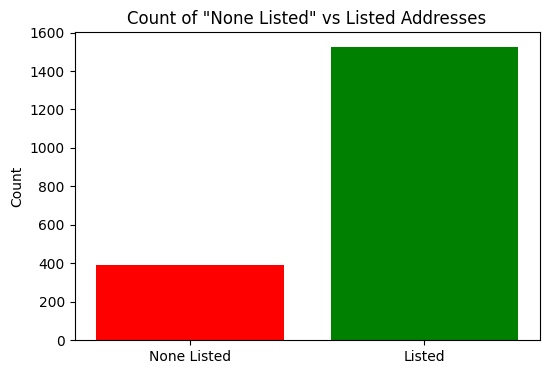

In [8]:
# Count the occurrences of "None Listed"
none_listed_count = df['full_address'].value_counts()['None listed']

# Count of all addresses
total_count = len(df)

# Data for visualization
counts = [none_listed_count, total_count - none_listed_count]
labels = ['None Listed', 'Listed']

# Bar chart to show the count of None Listed vs Listed
plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=['red', 'green'])
plt.ylabel('Count')
plt.title('Count of "None Listed" vs Listed Addresses')
plt.show()

#### We see that indeed, it is the case that the number of "None listed" matches the ones with missing latitudes and longitudes.

These will be removed when preparing the data for modeling.

## Looking at Prices

First, let's check out a correlation matrix with the integer and boolean variables with the price. 

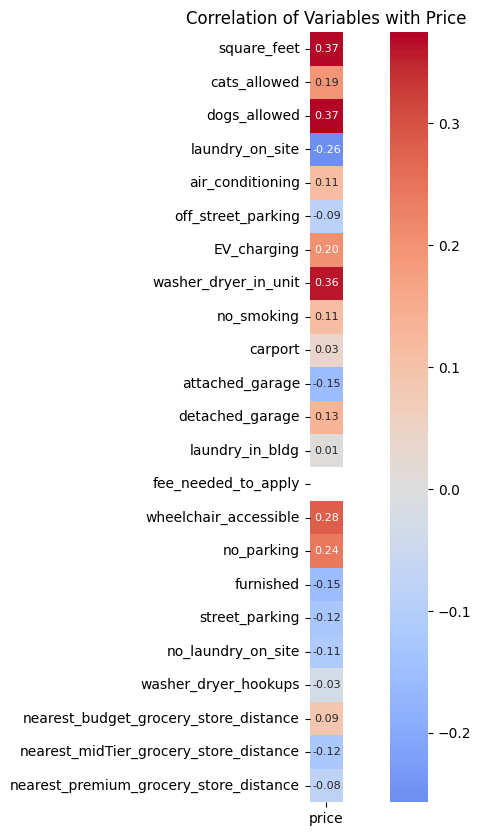

In [16]:
# Calculate the correlation matrix
corr = df[['price', 'square_feet', 'cats_allowed', 
           'dogs_allowed', 'laundry_on_site', 'air_conditioning', 
           'off_street_parking', 'EV_charging', 
           'washer_dryer_in_unit', 'no_smoking', 
           'carport', 'attached_garage', 'detached_garage', 
           'laundry_in_bldg', 'fee_needed_to_apply', 
           'wheelchair_accessible', 'no_parking', 'furnished', 
           'street_parking', 'no_laundry_on_site', 
           'washer_dryer_hookups', 
           'nearest_budget_grocery_store_distance', 
           'nearest_midTier_grocery_store_distance', 
           'nearest_premium_grocery_store_distance']].corr()

# Select only the 'price' column from the correlation matrix for plotting
price_corr = corr[['price']].drop(index='price')  # Drop the 'price' row to avoid the self-correlation

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(price_corr, annot=True, fmt=".2f", cmap='coolwarm', 
            center=0, square=True, annot_kws={"size": 8})
plt.title('Correlation of Variables with Price')
plt.show()

#### We see in the below histogram that the prices for apartments are relatively normally distributed, with a noticeable right skew.

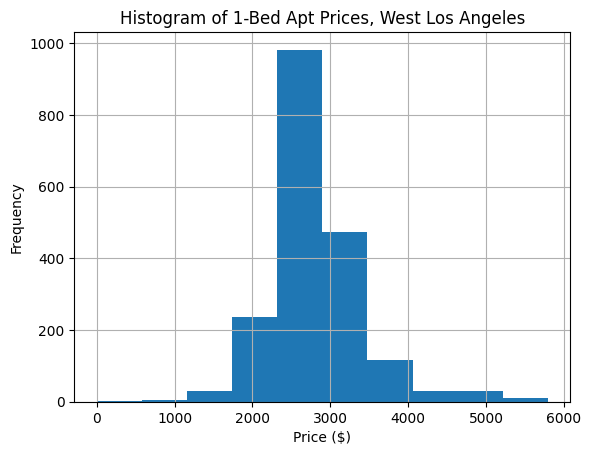

In [10]:
# Histogram for price
df['price'].hist()
plt.title('Histogram of 1-Bed Apt Prices, West Los Angeles')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

plt.show()

#### We notice a general right skewness to the data. 

This indicates that there is a majority of instances of lower priced apartments, but that there are several very highly priced apartments. These apartments would pull the mean up, so this visualization tells us that the mean would likely be higher than the median value. 

Let's take a look at some more visualizations.

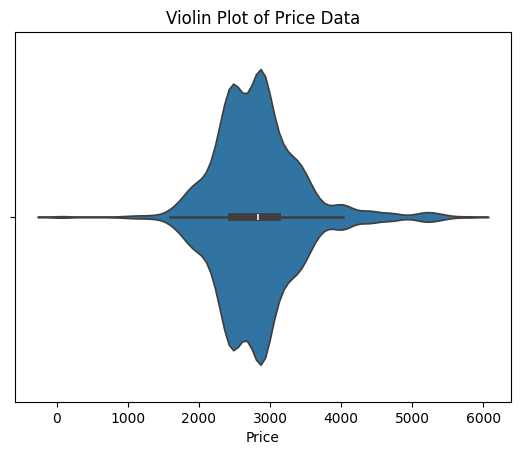

In [11]:
# Creating a violin plot of price data
sns.violinplot(x=df['price'])
plt.title('Violin Plot of Price Data')
plt.xlabel('Price')
plt.show()

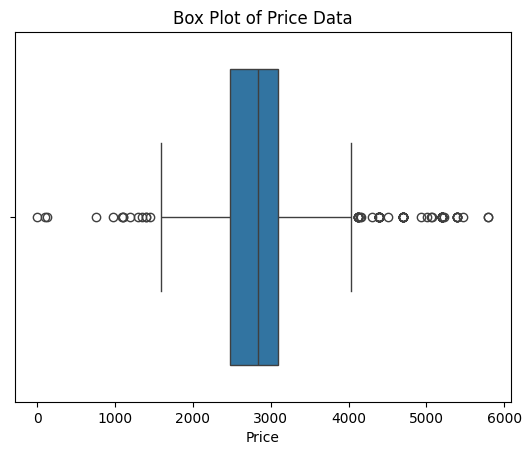

In [12]:
# Creating a boxplot of the price data
sns.boxplot(x=df['price'])
plt.title('Box Plot of Price Data')
plt.xlabel('Price')
plt.show()

#### Looking into prices on a map.

Below we use GeoPandas to create a color coded map of prices. The apartments will appear as colored circles on the map, with red being the cheapest and dark green being the most expensive. This will allow us to see whether particular areas are more expensive on the average than others.

First, we create a function to convert a DataFrame to a GeoDataFrame using the latitudes and longitudes of the listings.

In [13]:
# Convert DataFrame to GeoDataFrame
def convert_dataFrame_to_geoDataFrame(df):
    # Convert DataFrame to GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
    
    # Ensure the GeoDataFrame has the correct coordinate reference system (CRS)
    gdf.crs = "EPSG:4326"  # WGS84 Latitude/Longitude

    return gdf

Next, we call the convert_dataFrame_to_geoDataFrame and store the returned GeoDataFrame in a variable called gdf.

In [14]:
gdf = convert_dataFrame_to_geoDataFrame(df)

Next, we write a function called show_pricemap that takes in the GeoDataFrame as an input and 

In [15]:
def show_pricemap(gdf):
    
    # Define the boundaries of the map's focus to Santa Monica/West LA
    min_lat, max_lat = 33.95, 34.08 
    min_lon, max_lon = -118.5, -118.35  
    
    # Filter the GeoDataFrame to fit within these boundaries
    gdf_filtered = gdf[(gdf['latitude'] >= min_lat) & (gdf['latitude'] <= max_lat) &
                       (gdf['longitude'] >= min_lon) & (gdf['longitude'] <= max_lon)]
    
    # Convert the filtered GeoDataFrame to Web Mercator 
    # This is required for compatibility with contextily basemaps
    gdf_filtered = gdf_filtered.to_crs(epsg=3857)
    
    # Define the colormap to go from red (cheapest) to yellow to green (most expensive)
    cmap = plt.cm.RdYlGn  
    
    # Normalize the color scale to start at 1500 and cap at max price
    vmin, vmax = 1500, 5000
    norm = Normalize(vmin=vmin, vmax=vmax)
    
    # Plotting the GeoDataFrame with the custom colormap and normalized color scale
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    gdf_filtered.plot(column='price', cmap=cmap, norm=norm,
                      figsize=(10, 10), markersize=50, alpha=0.6,
                      legend=True, ax=ax,
                      legend_kwds={'shrink': 0.6, 'label': "Price (USD)"})
    
    # Add the base map of West LA
    # Without this step the plot will show the apartment dots over whitespace
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
    
    # Hide the axis for style purposes
    ax.set_axis_off()
    
    # Show the plot
    plt.show()

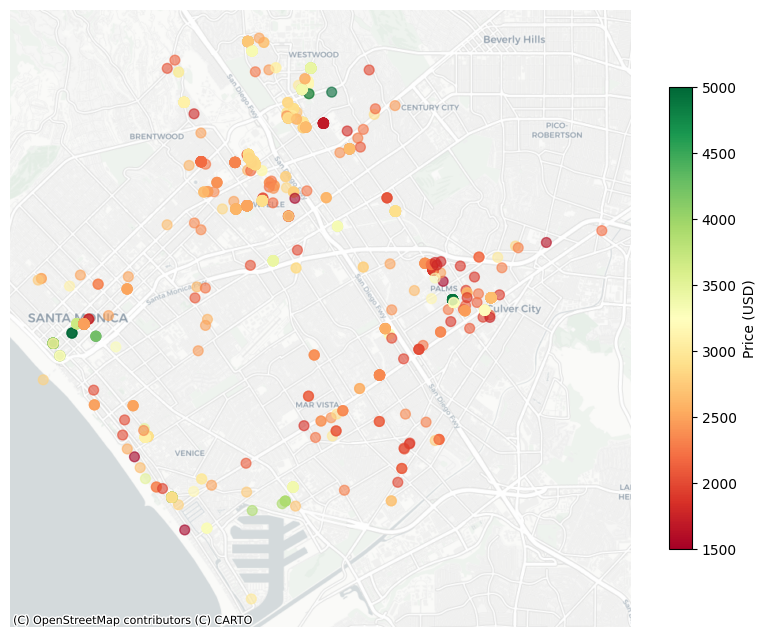

In [16]:
show_pricemap(gdf)

#### Let us discuss some observations of the above map.

We see that there is a cluster of expensive apartments in the heart of Santa Monica, next to the beach. However, we do not see a general trend of expensive apartments being at the beach. In Venice, for example, many of the listings are red/orange that are closer to the beach than even the Santa Monica ones. It does appear to be pricier the closer it gets to Marina Del Rey, however. This is seen at the bottom of the map (Marina Del Rey is not labeled but can be seen by its shape. It is a waterway cut into slices where boats are parked in the marina). 

In areas of highest density, there seems to be little separation in price aside from outliers. Two major examples are Palms and Sawtelle. Everything here, with an exception or two, is in the orange 2500-3000 range. One interesting note is that the heart of Westwood appears to be desirable. There is a cluster of highly priced (dark green) apartments there. 

## Exploring Dogs and Cats

Let's see how many apartments allow pets. First, we will write a function that will be used for all of our boolean (Yes vs. No) features. This will serve us for the pets question but also others. It will take in a dataframe, the feature name in question, a title for the user to include in their x-axis, and a feature keyword that will be used in the title of the plot.

In [19]:
# Writing the function to show a barchart for Yes vs. No features in the data
# Note that 1 will be considered "Yes" and 0 will be considered "No"
def show_boolean_features_barchart(df, feature_name, xlabel_title, feature_keyword): 
    # Get the value counts for the feature
    feature_counts = df[feature_name].value_counts().sort_index(ascending=False)
    
    # Specify colors for Yes and No bars
    colors = ['green' if x == 1 else 'red' for x in feature_counts.index]
    
    # Create a bar chart with the correct order for True and False
    feature_counts.plot(kind='bar', color=colors)
    
    # Set labels and title
    plt.xlabel(xlabel_title)
    plt.ylabel('Number of Apartments')
    plt.title(f'Distribution of Apartments With {feature_keyword} Indicated')

    # Check the number of unique values in the feature
    if len(feature_counts) == 1:
        # If there is only one value (only 1 or only 0)
        plt.xticks(ticks=[0], labels=feature_counts.index.map({1: 'Yes', 0: 'No'}).tolist())
    else:
        # If there are both 1s and 0s present
        plt.xticks(ticks=range(len(feature_counts.index)), labels=['Yes', 'No'])
        
    plt.show()

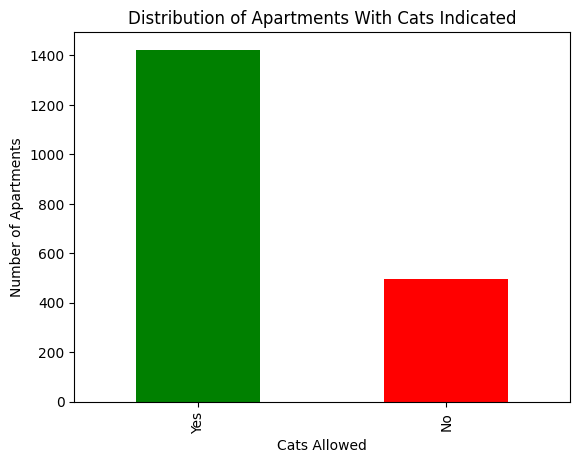

In [20]:
# Get cats_allowed bar chart
show_boolean_features_barchart(df, 'cats_allowed', 'Cats Allowed', 'Cats')

#### We see that more often than not, cats are allowed in the apartments. 

Let's now check on the dog policies.

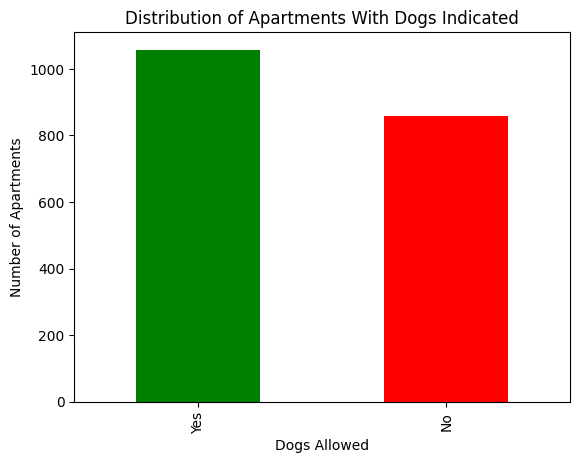

In [21]:
# Get dogs_allowed bar chart
show_boolean_features_barchart(df, 'dogs_allowed', 'Dogs Allowed', 'Dogs')

#### We see that dogs are often also allowed, but at a lower rate.

This might put a premium on the apartments willing to take the risk of allowing dogs in. While dogs can cause damage, they may be able to charge a higher price given that dog owners are restricting themselves to a smaller pool of apartments than cat owners. Having said that, there may be fewer people who own dogs than own cats, so the supply side might even it out. It will be interesting to test the effect of dogs and cats on the price when we set up the multiple regression model. 

## Exploring Laundry Situations

Let's check out the visualizations involving the laundry status.

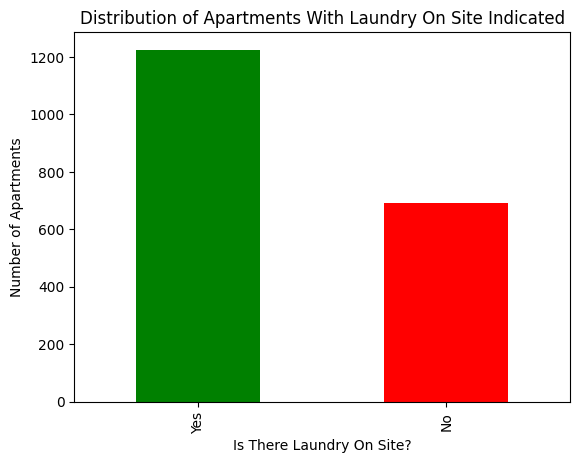

In [22]:
# Get laundry_on_site bar chart
show_boolean_features_barchart(df, 'laundry_on_site', 'Is There Laundry On Site?', 'Laundry On Site')

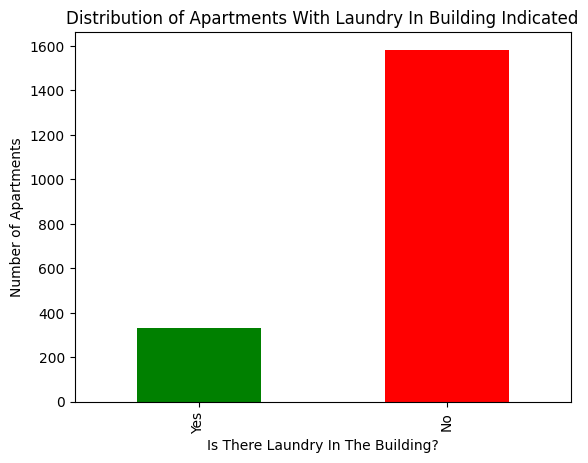

In [23]:
# Get laundry_in_bldg bar chart
show_boolean_features_barchart(df, 'laundry_in_bldg', 'Is There Laundry In The Building?', 'Laundry In Building')

#### We argue that "Laundry On Site" versus "Laundry In Building" are similar ways to express the same thing: 

That there is the capability to do laundry in the building such that a tenant does not need to take their clothes to the laundromat nearby. Thus, let us combine these two together to get a better picture of how many units have laundry. 

In [24]:
df['laundry_available'] = df['laundry_in_bldg'] | df['laundry_on_site']

#### After combining the two columns, we drop both laundry_in_bldg and laundry_on_site as they are no longer needed.

In [25]:
df.drop(columns=['laundry_in_bldg', 'laundry_on_site'], inplace=True)

#### Now we make a more accurate depiction of the laundry status in the building.

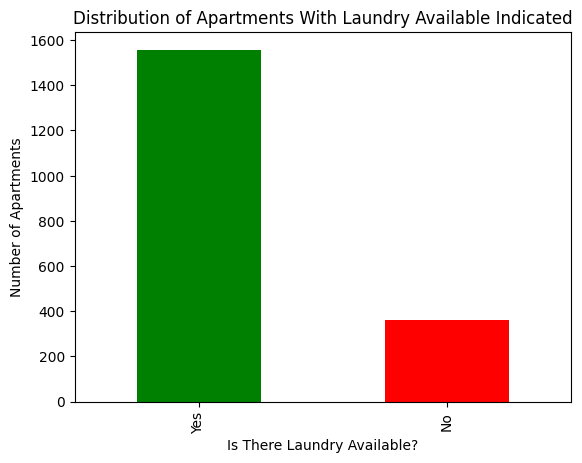

In [26]:
# Get laundry_available bar chart
show_boolean_features_barchart(df, 'laundry_available', 'Is There Laundry Available?', 'Laundry Available')

#### We see about 400 units that do not mention laundry on site. 

There is also a feature for "no_laundry_on_site" where the landlord specifically mentions that the laundry is not there. We want to drop this for modeling purposes due to multicollinearity concerns with the "laundry available" category. Nonetheless, we should visualize it once now before we drop it.

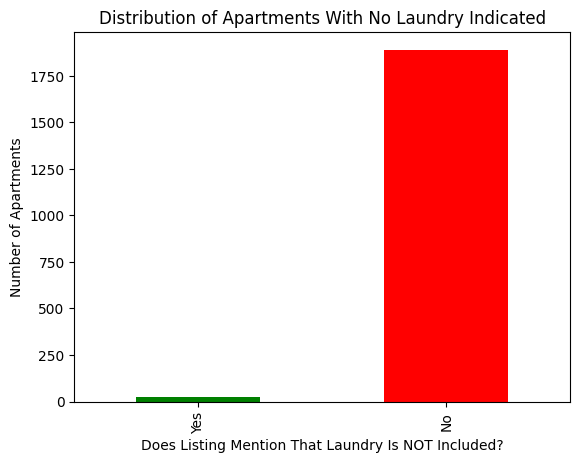

In [27]:
# Get no_laundry_on_site bar chart
show_boolean_features_barchart(df, 'no_laundry_on_site', 'Does Listing Mention That Laundry Is NOT Included?', 'No Laundry')

#### There are exceedingly few that explicitly say that there is no laundry at all. 

This points us in an interesting direction: there are about 350 that don't mention anything about whether or not laundry is on site. Let's explore this data a little bit and see what is going on here. We will partition a dataframe where both laundry_available and no_laundry_on_site are set to 0. 

In [28]:
# Create a partitioned dataframe where both laundry_available and no_laundry_on_site are set to 0
no_laundry_info_df = df[(df['no_laundry_on_site'] == 0) & (df['laundry_available'] == 0)]

In [29]:
no_laundry_info_df.head()

,title,price,Bedrooms,square_feet,full_address,monthly,apartment,cats_allowed,dogs_allowed,air_conditioning,off_street_parking,EV_charging,washer_dryer_in_unit,no_smoking,carport,attached_garage,detached_garage,fee_needed_to_apply,wheelchair_accessible,no_parking,furnished,street_parking,no_laundry_on_site,house,washer_dryer_hookups,latitude,longitude,nearest_budget_grocery_store_distance,nearest_budget_grocery_store,nearest_midTier_grocery_store_distance,nearest_midTier_grocery_store,nearest_premium_grocery_store_distance,nearest_premium_grocery_store,laundry_available
4,"SPECIALS, Rooftop Sky Deck, Brand New 1+1 Bren...",3438,1br,711.0,"11916 West Pico Boulevard, Los Angeles, CA 90064",1,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,34.029804,-118.448669,0.790421,"Smart & Final Extra! - 11221 W Pico Blvd, Los ...",0.267695,"Trader Joe's - 11755 W Olympic Blvd, Los Angeles",0.794601,"Whole Foods Market - 11666 National Blvd, Los ...",0
20,Renovated Furnished Co-living Near UCLA - Cent...,1695,1br,143.0,"1533 Selby Avenue, Los Angeles, CA 90024",1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,34.054629,-118.437713,1.243015,"Smart & Final Extra! - 11221 W Pico Blvd, Los ...",0.631696,"Trader Joe's - 1000 Glendon Ave, Los Angeles",0.182900,"Bristol Farms - 1515 Westwood Blvd, Los Angeles",0
22,"1 Month Free, SS Appliances, Furnished Co-Livi...",2050,1br,200.0,"Butler Ave, Los Angeles, CA 90025",1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,34.037859,-118.445324,0.450228,"Smart & Final Extra! - 11221 W Pico Blvd, Los ...",0.295439,"Ralphs Fresh Fare - 11727 W Olympic Blvd, Los ...",1.112632,"Bristol Farms - 1515 Westwood Blvd, Los Angeles",0
31,Check us out! Great 1 BD / 1 BA by public tran...,3125,1br,704.0,"10300 Venice Blvd, Culver City, CA 90232",1,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,34.020852,-118.402569,2.283281,"Smart & Final Extra! - 11221 W Pico Blvd, Los ...",1.796969,"Ralphs - 11361 National Blvd, Los Angeles",2.029898,"Whole Foods Market - 11666 National Blvd, Los ...",0
39,"1 Bed, Walk in closets, Smoke free community",3095,1br,670.0,"210 Santa Monica Blvd, Santa Monica, CA 90401",1,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,34.014895,-118.496592,2.099805,"Smart & Final Extra! - 604 Lincoln Blvd, Venice",0.283860,"Trader Joe's - 500 Broadway, Santa Monica",1.244807,"Whole Foods Market - 1425 Montana Ave, Santa M...",0


#### At first glance, we see that a sample indicates that many of them contain washer/dryers in the unit.

Let's investigate further to see if the ones with washer/dryer in unit are the culprit.

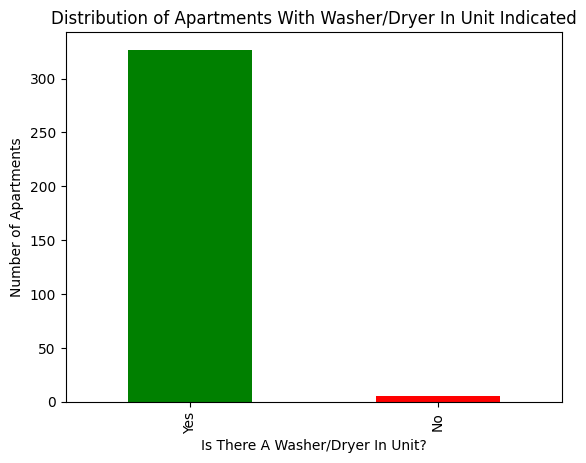

In [30]:
show_boolean_features_barchart(no_laundry_info_df, 'washer_dryer_in_unit', 'Is There A Washer/Dryer In Unit?', 'Washer/Dryer In Unit')

We find that yes, most of the ones that do not indicate washer/dryer on site have washer/dryers in the actual unit. We still have a few without mention. Let's take a look at these ones. 

In [31]:
# Create a partitioned dataframe where both laundry_available and no_laundry_on_site are set to 0
washer_dryer_removed_no_laundry_info_df = no_laundry_info_df[(no_laundry_info_df['washer_dryer_in_unit'] == 0)]

In [32]:
washer_dryer_removed_no_laundry_info_df

,title,price,Bedrooms,square_feet,full_address,monthly,apartment,cats_allowed,dogs_allowed,air_conditioning,off_street_parking,EV_charging,washer_dryer_in_unit,no_smoking,carport,attached_garage,detached_garage,fee_needed_to_apply,wheelchair_accessible,no_parking,furnished,street_parking,no_laundry_on_site,house,washer_dryer_hookups,latitude,longitude,nearest_budget_grocery_store_distance,nearest_budget_grocery_store,nearest_midTier_grocery_store_distance,nearest_midTier_grocery_store,nearest_premium_grocery_store_distance,nearest_premium_grocery_store,laundry_available
413,UNITS Available *WESTSIDE AREA (11422 Iowa Ave),2675,1br,NaN,None listed,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
525,"Close to UCLA, Westwood Village",2495,1br,700.0,"1375 Midvale Avenue, Los Angeles, CA 90024",1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,34.055377,-118.443587,1.339288,"Smart & Final Extra! - 11221 W Pico Blvd, Los ...",0.476346,"Trader Joe's - 1000 Glendon Ave, Los Angeles",0.216031,"Bristol Farms - 1515 Westwood Blvd, Los Angeles",0
1491,"Bright and newly remodeled throughout, this be...",1800,1br,855.0,"11645 Montana Avenue,, Los Angeles, CA, CA 90049",1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,34.056334,-118.465912,1.145390,"Smart & Final - 12210 Santa Monica Blvd W, Los...",0.788012,"Ralphs Fresh Fare - 12057 Wilshire Blvd, Los A...",0.204288,"Whole Foods Market - 11737 San Vicente Blvd, L...",0
1555,"Bungalow, north of Wilshire",2800,1br,600.0,"833 7th St, Santa Monica, CA 90403",1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,34.026271,-118.500789,2.283420,"Smart & Final - 12210 Santa Monica Blvd W, Los...",0.623390,"Vons - 1311 Wilshire Blvd, Santa Monica",0.574529,"Whole Foods Market - 1425 Montana Ave, Santa M...",0
1834,Close to UCLA and Westwood Village,2650,1br,650.0,"1375 Midvale Ave, Los Angeles, CA 90024",1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,34.055377,-118.443587,1.339288,"Smart & Final Extra! - 11221 W Pico Blvd, Los ...",0.476346,"Trader Joe's - 1000 Glendon Ave, Los Angeles",0.216031,"Bristol Farms - 1515 Westwood Blvd, Los Angeles",0


#### We see from these limited results that it might potentially be the case that these apartments have hookups.

This would mean that the tenant must bring their own washer/dryer with them. Let's visualize this. 

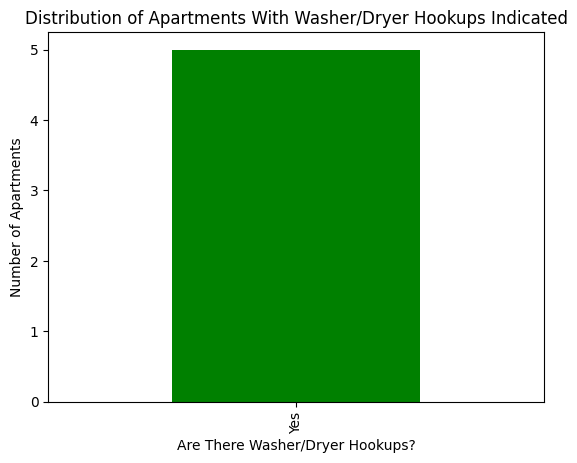

In [33]:
# Create a partitioned dataframe where both laundry_available and no_laundry_on_site are set to 0
show_boolean_features_barchart(washer_dryer_removed_no_laundry_info_df, 'washer_dryer_hookups', 'Are There Washer/Dryer Hookups?', 'Washer/Dryer Hookups')

#### We see that the units with hookups round out the rest of the laundry specifications.